### Introduction
This notebook enhances the previous analysis of coefficients of lift and drag in cylinder vortex shedding by now varying $\tau$, the degree of time-delay embedding, thereby producing a range of sparse models.

We again load the data and time-delay embed our chosen signal; we then fit a model with a specified $\lambda$, the parameter that controls sparsity. We repeat this process for a range of values of $\tau$.



In [1]:
###  Import modules

import numpy as np
import matplotlib.pyplot as plt
import json

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


###  Load the analysis settings and parameters

#  Load the configuration file with all settings
with open('Lift-config.json', 'r') as f:
    config = json.load(f)

#  Read out and import all variables
for key, value in config.items():  print(f"{key}: {value}")
globals().update(config)



Re: 50
l_d_flag: lift
t_trm_1: 25000
t_trm_2: 50000
TDE_or_ddt: TDE
TD_Embed: 4
threshold: 0
poly_order: 3
diff_order: 2
should_normalize: 1


In [2]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>

In [3]:
###  Initiate and run SINDy, iteratively for varying sparisty

from runSINDy_Iter_TDE import fnc_runSINDy_Iter_TDE
TDE_vec , Coefs_u1 , Coefs_u2 , NRMSE_1 , NRMSE_2 , NRMSE_sys = \
fnc_runSINDy_Iter_TDE()





Iterating from tau = 0 to tau = 4

Iteration  =  0  /  20  |  tau  =  0.0
Iteration  =  2  /  20  |  tau  =  0.4
Iteration  =  4  /  20  |  tau  =  0.8
Iteration  =  6  /  20  |  tau  =  1.2000000000000002
Iteration  =  8  /  20  |  tau  =  1.6
Iteration  =  10  /  20  |  tau  =  2.0
Iteration  =  12  /  20  |  tau  =  2.4000000000000004
Iteration  =  14  /  20  |  tau  =  2.8000000000000003
Iteration  =  16  /  20  |  tau  =  3.2
Iteration  =  18  /  20  |  tau  =  3.6
Iteration  =  20  /  20  |  tau  =  4.0


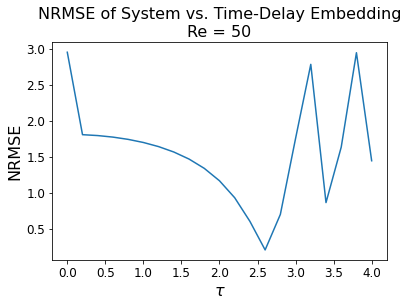

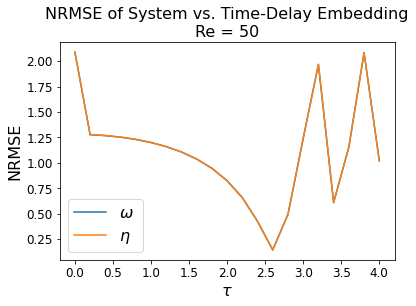

In [4]:
###  Plot NRMSE of the system vs. sparsity

plt.figure()
plt.plot( TDE_vec , NRMSE_sys  )
plt.xlabel(r'$\tau$' , fontsize=16)
plt.ylabel('NRMSE' , fontsize=16)
ttl_str = 'NRMSE of System vs. Time-Delay Embedding' + '\nRe = ' + str(Re)
plt.title(ttl_str , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


###  Plot NRMSE of each signal vs. sparsity

plt.figure()
plt.plot( TDE_vec , NRMSE_1 , label=r'$\omega$' )
plt.plot( TDE_vec , NRMSE_2 , label=r'$\eta$  ' )
plt.xlabel(r'$\tau$' , fontsize=16)
plt.ylabel('NRMSE' , fontsize=16)
ttl_str = 'NRMSE of System vs. Time-Delay Embedding' + '\nRe = ' + str(Re)
plt.title(ttl_str , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=16)
plt.show()



In [5]:
###  Plot the coefficients of the system vs. sparsity



